In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [32]:
import yfinance as yf

# Define the stock tickers
tickers = ['TSLA', 'BND', 'SPY']

# Download historical data
data = yf.download(tickers, start='2015-01-01', end='2025-01-01')

# Check the columns to understand the data structure
print(data.columns)


[*********************100%***********************]  3 of 3 completed

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [33]:

print(data.head())
print(data.columns)


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573147  172.592896  14.620667  62.603431  173.811130   
2015-01-05  62.754787  169.475891  14.006000  62.777499  171.702294   
2015-01-06  62.936573  167.879623  14.085333  63.125845  170.316066   
2015-01-07  62.974392  169.971634  14.063333  63.050099  170.316100   
2015-01-08  62.875950  172.987717  14.041333  62.921373  173.206165   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.399015  171.542703  14.217333  62.406587   
2015-01-05  14.433333  62.610939  169.165038  13.810667  62.641224   
2015-01-06  14.280000  62.860866  167.073070  13.614000  62.860866   
2015-01-07 

In [34]:
# Check basic statistics
print(data.describe())

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      69.271660   313.957382   115.679423    69.373265   315.610190   
std        4.805705   115.831463   114.226440     4.813920   116.392582   
min       61.860870   156.800888     9.578000    61.937357   157.864182   
25%       65.540436   214.664387    17.185167    65.615712   215.321668   
50%       68.239468   276.422562    28.505667    68.364108   277.178165   
75%       72.892397   404.020767   220.205002    72.966620   406.288471   
max       78.823265   605.771179   479.859985    78.920142   607.026962   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     118.250154    6

In [35]:
# Option 1: Interpolate missing values
data = data.interpolate(method='linear')

# Option 2: Fill forward/backward
# data = data.fillna(method='ffill').fillna(method='bfill')

# Double-check for any remaining missing values
print(data.isnull().sum())


Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Compare original and scaled data
print(scaled_data.head())


Price          Close                          High                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.041992  0.035174  0.010723  0.039221  0.035504  0.009519   
2015-01-05  0.052700  0.028231  0.009416  0.049470  0.030809  0.008578   
2015-01-06  0.063417  0.024676  0.009584  0.069982  0.027722  0.008257   
2015-01-07  0.065646  0.029335  0.009538  0.065522  0.027723  0.008338   
2015-01-08  0.059843  0.036053  0.009491  0.057942  0.034157  0.008201   

Price            Low                          Open                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.033974  0.037454  0.010743  0.030313  0.037917  0.011513   
2015-01-05  0.046466  0.032174  0.009835  0.044120  0.033785  0.010324   
2015-01-06  0.061197  0.027528  0.009

In [37]:
# Flatten the columns if multi-indexed
data.columns = ['_'.join(col).strip() for col in data.columns]

print(data.columns)


Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')


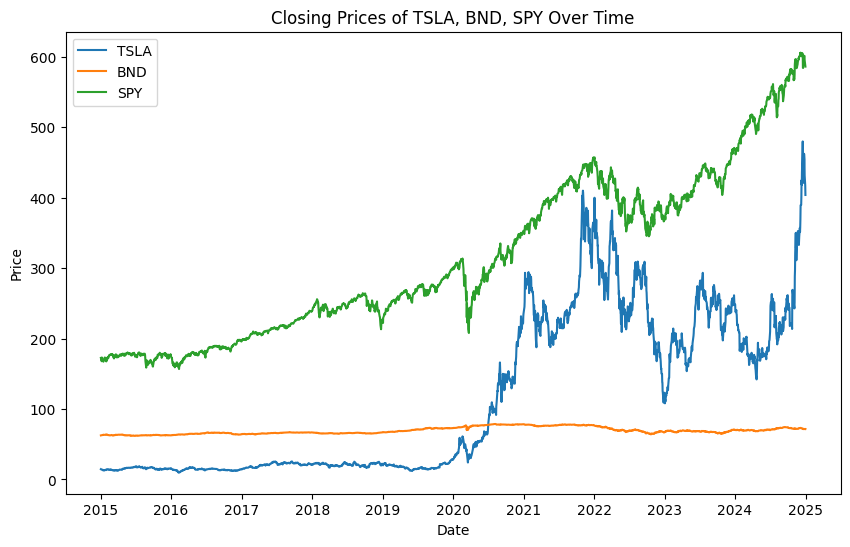

In [38]:
# Plotting the closing prices
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(data.index, data[f'Close_{ticker}'], label=ticker)

plt.title('Closing Prices of TSLA, BND, SPY Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [39]:
 #Flatten the multi-index columns if needed
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Display the columns to verify the structure
print("Original Columns:", data.columns)

# Rename 'Close' columns to match ticker names directly
rename_mapping = {
    'Close_TSLA': 'TSLA',
    'Close_BND': 'BND',
    'Close_SPY': 'SPY'
}

# Only rename if the expected columns exist
available_columns = set(data.columns)
for original, new_name in rename_mapping.items():
    if original in available_columns:
        data = data.rename(columns={original: new_name})

# Verify column names after renaming
print("Renamed Columns:", data.columns)

# Calculate daily percentage change (returns)
returns = data[['TSLA', 'BND', 'SPY']].pct_change().dropna()

# Verify the columns of the 'returns' DataFrame
print("Returns Columns:", returns.columns)

Original Columns: Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Renamed Columns: Index(['BND', 'SPY', 'TSLA', 'High_BND', 'High_SPY', 'High_TSLA', 'Low_BND',
       'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
       'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Returns Columns: Index(['TSLA', 'BND', 'SPY'], dtype='object')


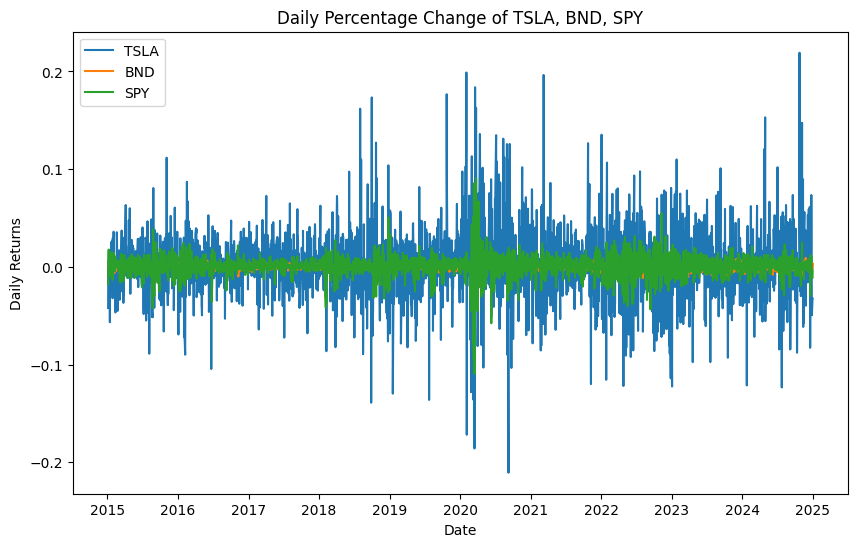

In [40]:
#Plotting the Daily Percentage Changes:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Percentage Change of TSLA, BND, SPY')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()



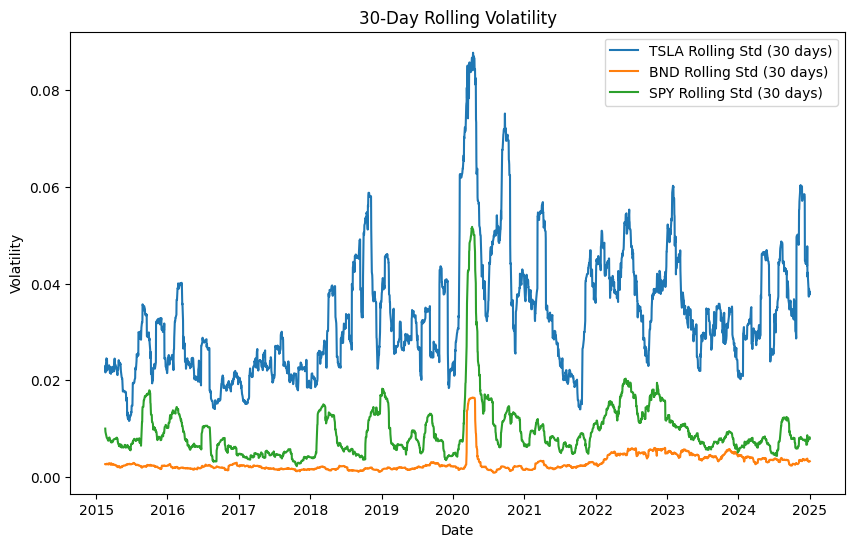

In [41]:
# Volatility Analysis: Rolling Means & Standard Deviations
window_size = 30  # 30-day rolling window

plt.figure(figsize=(10, 6))
for ticker in tickers:
    rolling_std = returns[ticker].rolling(window=window_size).std()
    plt.plot(rolling_std, label=f'{ticker} Rolling Std (30 days)')

plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


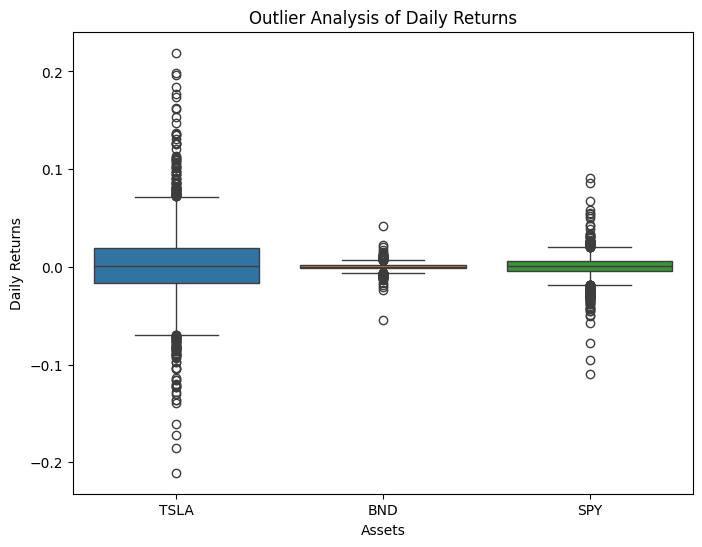

Outliers for TSLA:
count    52.000000
mean      0.009947
std       0.138615
min      -0.210628
25%      -0.120241
50%       0.009717
75%       0.134925
max       0.219190
Name: TSLA, dtype: float64
Outliers for BND:
count    52.000000
mean     -0.000270
std       0.015556
min      -0.054385
25%      -0.010240
50%      -0.000176
75%       0.010628
max       0.042200
Name: BND, dtype: float64
Outliers for SPY:
count    52.000000
mean     -0.002104
std       0.047870
min      -0.109424
25%      -0.038554
50%      -0.002813
75%       0.032731
max       0.090603
Name: SPY, dtype: float64


In [42]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=returns)
plt.title('Outlier Analysis of Daily Returns')
plt.xlabel('Assets')
plt.ylabel('Daily Returns')
plt.show()

# Analyzing extreme values
for ticker in tickers:
    outliers = returns[(returns[ticker] > returns[ticker].quantile(0.99)) | 
                       (returns[ticker] < returns[ticker].quantile(0.01))]
    print(f'Outliers for {ticker}:')
    print(outliers[ticker].describe())


<Figure size 1000x800 with 0 Axes>

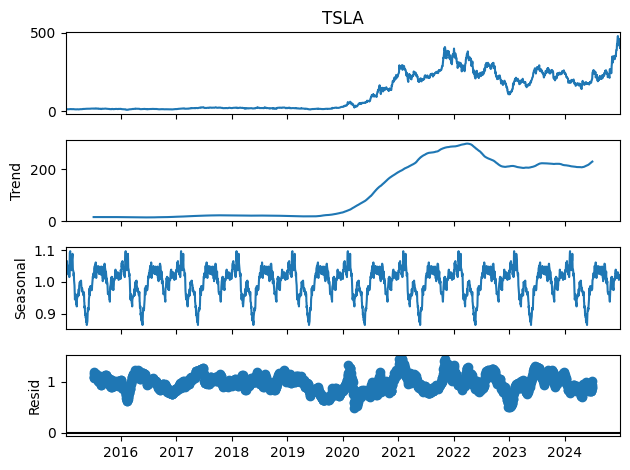

In [43]:
# Decomposition for Tesla stock
decompose_result = seasonal_decompose(data['TSLA'], model='multiplicative', period=252)

# Plotting the decomposition
plt.figure(figsize=(10, 8))
decompose_result.plot()
plt.show()


In [44]:
 #Key Financial Metrics: VaR & Sharpe Ratio
# Value at Risk (VaR)
# 95% VaR assuming normal distribution
var_95 = returns['TSLA'].quantile(0.05)
print(f"95% Value at Risk (VaR) for TSLA: {var_95:.4f}")


95% Value at Risk (VaR) for TSLA: -0.0514


In [45]:
#Sharpe Ratio
# Assuming a risk-free rate of 3% annualized
risk_free_rate = 0.03
trading_days = 252

sharpe_ratio = (returns.mean() * trading_days - risk_free_rate) / (returns.std() * np.sqrt(trading_days))
print(f"Sharpe Ratio for TSLA: {sharpe_ratio['TSLA']:.4f}")


Sharpe Ratio for TSLA: 0.8141


In [46]:
# Define the training and testing split (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')


Training data shape: (2012, 15)
Testing data shape: (504, 15)


In [47]:
# Select only the 'TSLA' column for closing prices
train_data = train_data[['TSLA']]

# Check the data shape and preview the data
print(train_data.shape)  # Should be (n_samples, 1)
print(train_data.head())



(2012, 1)
                 TSLA
Date                 
2015-01-02  14.620667
2015-01-05  14.006000
2015-01-06  14.085333
2015-01-07  14.063333
2015-01-08  14.041333


In [48]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pmdarima import auto_arima

# Use the correct 'TSLA' column for forecasting
arima_model = auto_arima(train_data['TSLA'],  # Pass as a 1D array
                         seasonal=False, 
                         trace=True, 
                         suppress_warnings=True,
                         stepwise=True)

print(arima_model.summary())


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12578.748, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12574.896, Time=0.07 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12573.929, Time=0.17 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12574.048, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12573.054, Time=0.08 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12574.793, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.582 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6285.527
Date:                Sun, 02 Mar 2025   AIC                          12573.054
Time:                        09:04:25   BIC                          12578.660
Sample:                             0   HQIC                         12575.112
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        30.3650      0.330     91.884      0.000      29.717

c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

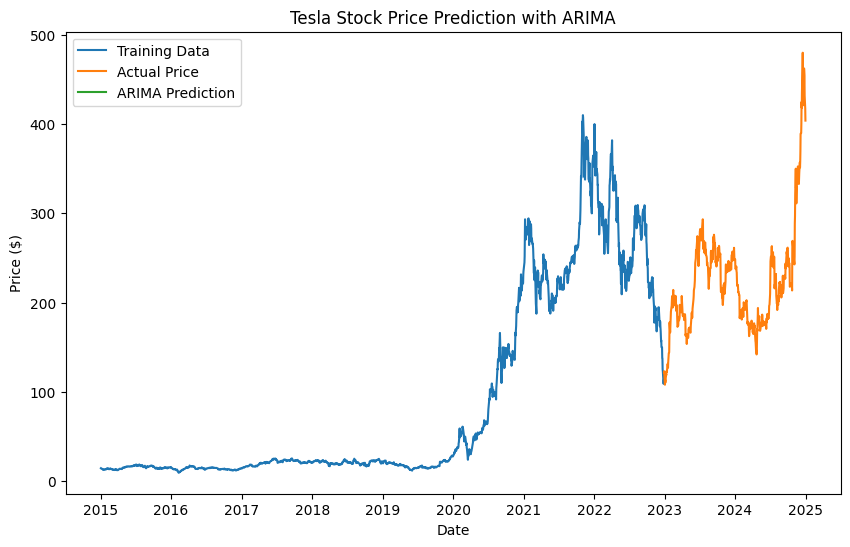

In [49]:
# Train ARIMA with the best found parameters
model_arima = ARIMA(train_data, order=arima_model.order)
model_arima_fit = model_arima.fit()

# Forecast the test set length
forecast_arima = model_arima_fit.forecast(steps=len(test_data))
test_data['ARIMA_Prediction'] = forecast_arima

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TSLA'], label='Training Data')
plt.plot(test_data.index, test_data['TSLA'], label='Actual Price')
plt.plot(test_data.index, test_data['ARIMA_Prediction'], label='ARIMA Prediction')
plt.title('Tesla Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

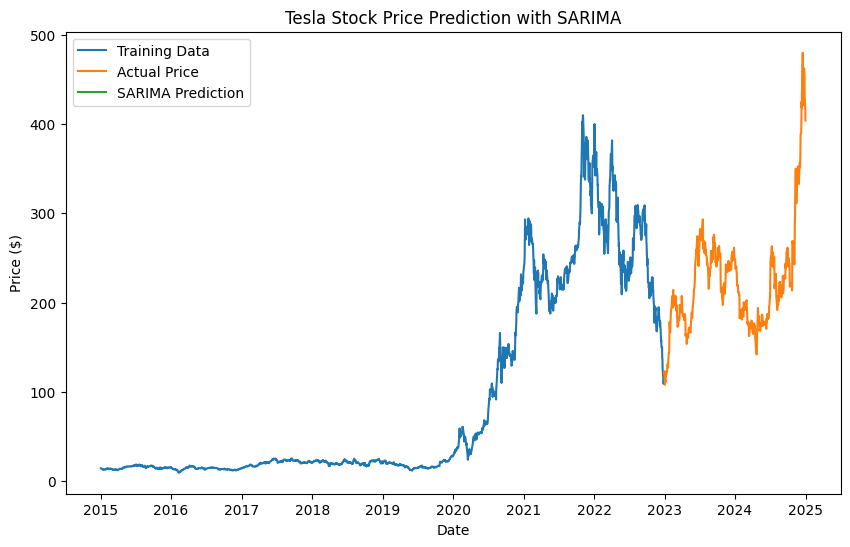

In [50]:
# Define and train the SARIMA model
model_sarima = SARIMAX(train_data, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast using SARIMA
forecast_sarima = model_sarima_fit.forecast(steps=len(test_data))
test_data['SARIMA_Prediction'] = forecast_sarima

# Plot the SARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['TSLA'], label='Training Data')
plt.plot(test_data.index, test_data['TSLA'], label='Actual Price')
plt.plot(test_data.index, test_data['SARIMA_Prediction'], label='SARIMA Prediction')
plt.title('Tesla Stock Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM (60 days lookback)
def create_dataset(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Split and reshape data
lookback = 60
X_train, y_train = create_dataset(scaled_data[:train_size], lookback)
X_test, y_test = create_dataset(scaled_data[train_size:], lookback)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [52]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)


C:\Users\Hasan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0544
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0040
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0039
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0032
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0029
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0027
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0029
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0028
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0021
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0026
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0023
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0030
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0021
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0025
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0024
Epoc

In [53]:
def evaluate_model(true, predicted, model_name="Model"):
    if len(true) == 0 or len(predicted) == 0:
        print(f"{model_name}: No data available for evaluation!")
        return
    
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = mean_absolute_percentage_error(true, predicted) * 100
    
    print(f"📊 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")


In [71]:
# Ensure model is trained before making predictions
if 'model_lstm' not in locals():
    print("❌ LSTM model is not defined. Train the model before making predictions.")
else:
    # Check if model was trained
    print(model_lstm.summary())

    # Generate predictions
    predicted_stock_price = model_lstm.predict(X_test)

    # Verify output
    print(f"✅ LSTM Predictions Generated! Shape: {predicted_stock_price.shape}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

None
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
✅ LSTM Predictions Generated! Shape: (492, 1)


In [72]:
# Check the lengths and ensure no NaNs are present
print("Data ready for evaluation:")
print("TSLA length:", len(test_data['TSLA']))
print("ARIMA_Prediction length:", len(test_data['ARIMA_Prediction']))
print("SARIMA_Prediction length:", len(test_data['SARIMA_Prediction']))
print("LSTM Prediction length:", len(predicted_stock_price))
# Handle any remaining NaNs by filling or dropping them
test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
test_data['SARIMA_Prediction'].fillna(method='ffill', inplace=True)

# Ensure predicted_stock_price is aligned with true values
predicted_stock_price = predicted_stock_price[-len(test_data['TSLA']):]


Data ready for evaluation:
TSLA length: 504
ARIMA_Prediction length: 504
SARIMA_Prediction length: 504
LSTM Prediction length: 492


C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\182311713.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\182311713.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\182311713.py:9: FutureWarning: A va

In [73]:
# Ensure the predicted values array matches the length of the true values
predicted_stock_price = predicted_stock_price[-len(test_data['TSLA']):]

# Validate the lengths before evaluation
print("TSLA length:", len(test_data['TSLA']))
print("LSTM Prediction length:", len(predicted_stock_price))


TSLA length: 504
LSTM Prediction length: 492


In [74]:
# Check the shape of test_data before cleaning
print("Initial test_data shape:", test_data.shape)

# Check for NaNs in the specific columns
print(test_data[['TSLA', 'ARIMA_Prediction', 'SARIMA_Prediction']].isnull().sum())



Initial test_data shape: (504, 17)
TSLA                   0
ARIMA_Prediction     504
SARIMA_Prediction    504
dtype: int64


In [75]:
# Fill NaNs in ARIMA and SARIMA prediction columns using forward fill
test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
test_data['SARIMA_Prediction'].fillna(method='ffill', inplace=True)

# Alternatively, fill NaNs with the mean of each column
# test_data['ARIMA_Prediction'].fillna(test_data['ARIMA_Prediction'].mean(), inplace=True)
# test_data['SARIMA_Prediction'].fillna(test_data['SARIMA_Prediction'].mean(), inplace=True)

# Check for NaNs after filling
print(test_data[['TSLA', 'ARIMA_Prediction', 'SARIMA_Prediction']].isnull().sum())


TSLA                   0
ARIMA_Prediction     504
SARIMA_Prediction    504
dtype: int64


C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\4218554921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\4218554921.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_16508\4218554921.py:3: FutureWarning: A

In [76]:
# Drop rows with NaNs only in 'TSLA' while keeping the predictions intact
test_data = test_data.dropna(subset=['TSLA'])

# Check the updated lengths of all relevant columns
print("After filling NaNs:")
print("Length of TSLA values:", len(test_data['TSLA']))
print("Length of ARIMA predictions:", len(test_data['ARIMA_Prediction']))
print("Length of SARIMA predictions:", len(test_data['SARIMA_Prediction']))


After filling NaNs:
Length of TSLA values: 504
Length of ARIMA predictions: 504
Length of SARIMA predictions: 504


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

def evaluate_model(true, predicted, model_name="Model"):
    # Check if arrays are empty
    if len(true) == 0 or len(predicted) == 0:
        print(f"{model_name}: No data available for evaluation!")
        return
    
    # Check for NaNs in the data
    if np.isnan(true).any() or np.isnan(predicted).any():
        print(f"{model_name}: Data contains NaN values! Evaluation aborted.")
        return
    
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = mean_absolute_percentage_error(true, predicted) * 100
    
    print(f"📊 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")


In [78]:
print("Length of TSLA values:", len(test_data['TSLA']))
print("Length of LSTM predictions:", len(predicted_stock_price))


Length of TSLA values: 504
Length of LSTM predictions: 492


In [79]:
# Ensure the predicted values array matches the length of the true values
predicted_stock_price = predicted_stock_price[-len(test_data['TSLA']):]

# Recheck lengths to confirm alignment
print("Aligned TSLA length:", len(test_data['TSLA']))
print("Aligned LSTM Prediction length:", len(predicted_stock_price))


Aligned TSLA length: 504
Aligned LSTM Prediction length: 492


In [80]:
# Align 'TSLA' true values with the length of LSTM predictions
test_data = test_data[-len(predicted_stock_price):]

# Check the updated lengths
print("Final TSLA length:", len(test_data['TSLA']))
print("Final LSTM Prediction length:", len(predicted_stock_price))


Final TSLA length: 492
Final LSTM Prediction length: 492


In [81]:
def evaluate_model(true, predicted, model_name="Model"):
    if len(true) == 0 or len(predicted) == 0:
        print(f"{model_name}: No data available for evaluation!")
        return
    
    if np.isnan(true).any() or np.isnan(predicted).any():
        print(f"{model_name}: Data contains NaN values! Evaluation aborted.")
        return
    
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = mean_absolute_percentage_error(true, predicted) * 100
    
    print(f"📊 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

# Safely evaluate the LSTM model
evaluate_model(test_data['TSLA'], predicted_stock_price, "LSTM")


📊 LSTM Performance:
MAE: 225.77
RMSE: 232.88
MAPE: 99.80%


In [82]:
# Forecasting 6-12 months ahead (e.g., 180 days)
forecast_period = 180


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16374.056, Time=2.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16368.573, Time=0.08 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16370.458, Time=0.20 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16370.460, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16368.109, Time=0.06 sec


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16372.458, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.968 seconds


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


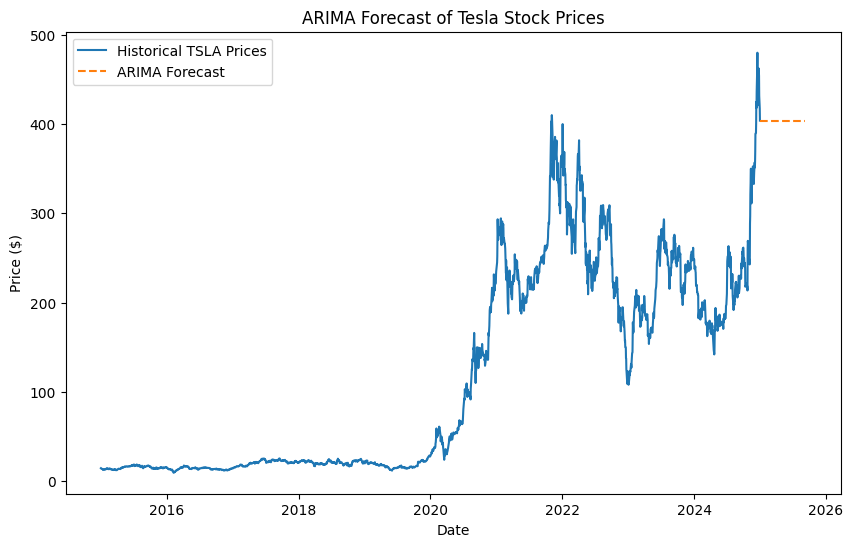

In [83]:
# Fit the ARIMA model on the entire data
arima_model = auto_arima(data['TSLA'], seasonal=False, trace=True, suppress_warnings=True)

# Generate future predictions using the ARIMA model
arima_forecast = arima_model.predict(n_periods=forecast_period)

# Create a future date range for plotting
future_dates = pd.date_range(start=data.index[-1], periods=forecast_period + 1, freq='B')[1:]

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

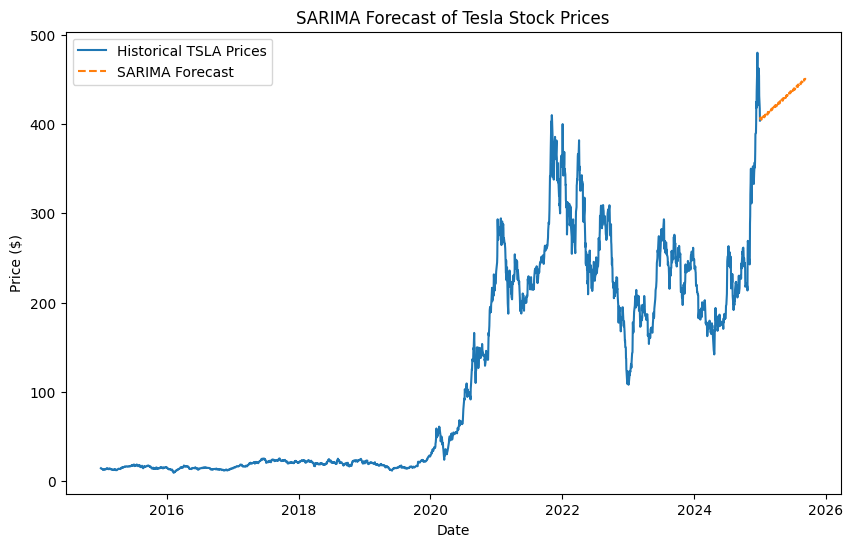

In [84]:
# Fit the SARIMA model
sarima_model = SARIMAX(data['TSLA'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future prices using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=forecast_period).predicted_mean

# Plot SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [85]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['TSLA']])

# Create datasets for LSTM
def create_dataset(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 60
X, y = create_dataset(scaled_data, lookback)

# Reshape the data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(lookback, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\Hasan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0275 - val_loss: 0.0024
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0012 - val_loss: 0.0015


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━

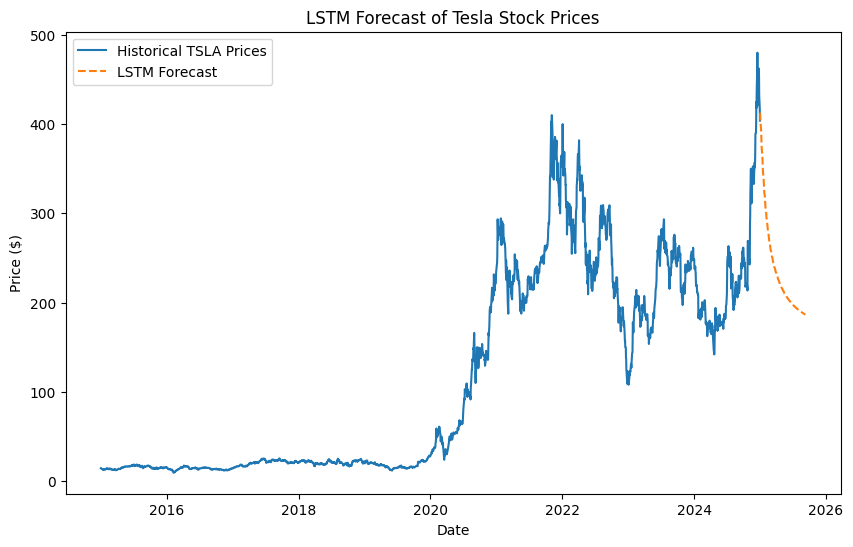

In [87]:
# Prepare data for future predictions
last_data = scaled_data[-lookback:]
future_predictions = []

for _ in range(forecast_period):
    X_input = last_data.reshape((1, lookback, 1))
    predicted_price = model_lstm.predict(X_input)
    future_predictions.append(predicted_price[0, 0])
    last_data = np.append(last_data[1:], predicted_price, axis=0)

# Inverse scale the predictions
lstm_forecast = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, lstm_forecast, label='LSTM Forecast', linestyle='--')
plt.title('LSTM Forecast of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


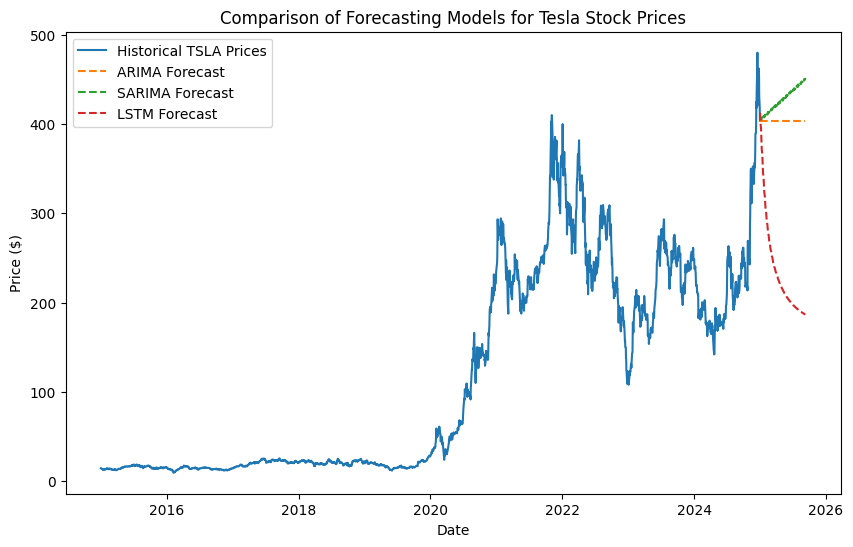

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA'], label='Historical TSLA Prices')
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.plot(future_dates, lstm_forecast, label='LSTM Forecast', linestyle='--')
plt.title('Comparison of Forecasting Models for Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [94]:
# Check the correct column name
print(data.columns)

# Extract TSLA closing prices
train_tsla = data['TSLA'].dropna()
print(train_tsla.head())  # Ensure data is loaded correctly


Index(['BND', 'SPY', 'TSLA', 'High_BND', 'High_SPY', 'High_TSLA', 'Low_BND',
       'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
       'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Date
2015-01-02    14.620667
2015-01-05    14.006000
2015-01-06    14.085333
2015-01-07    14.063333
2015-01-08    14.041333
Name: TSLA, dtype: float64


In [95]:
# Extract only the TSLA closing prices
train_tsla = data["TSLA"].dropna()

# Convert to time series format
train_tsla.index = pd.to_datetime(data.index)  # Ensure the index is a DateTime format

# Verify data
print(train_tsla.head())



Date
2015-01-02    14.620667
2015-01-05    14.006000
2015-01-06    14.085333
2015-01-07    14.063333
2015-01-08    14.041333
Name: TSLA, dtype: float64


In [96]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train_tsla, order=(5,1,0))
arima_fitted = arima_model.fit()

# Generate future predictions
forecasted_tsla_prices = arima_fitted.forecast(steps=30)  # Predict for 30 days
print(forecasted_tsla_prices)


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2516    403.247023
2517    402.563185
2518    402.491701
2519    402.207281
2520    402.380685
2521    402.361623
2522    402.372982
2523    402.362061
2524    402.372468
2525    402.369133
2526    402.370019
2527    402.369342
2528    402.369904
2529    402.369625
2530    402.369716
2531    402.369671
2532    402.369704
2533    402.369685
2534    402.369693
2535    402.369689
2536    402.369691
2537    402.369690
2538    402.369691
2539    402.369690
2540    402.369691
2541    402.369691
2542    402.369691
2543    402.369691
2544    402.369691
2545    402.369691
Name: predicted_mean, dtype: float64


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [98]:
# Define train-test split ratio
split_ratio = 0.8
train_size = int(len(data) * split_ratio)

# Split the dataset
train_tsla = data['TSLA'].iloc[:train_size]
test_tsla = data['TSLA'].iloc[train_size:]

# Verify data
print(f"Train size: {len(train_tsla)}, Test size: {len(test_tsla)}")


Train size: 2012, Test size: 504


In [ ]:
#Compute Annualized Return for Each Asset
# Calculate mean daily return
mean_daily_returns = returns.mean()

# Convert to annualized return
annual_returns = mean_daily_returns * 252  # 252 trading days in a year
print(annual_returns)


TSLA    0.495369
BND     0.015096
SPY     0.138110
dtype: float64


In [ ]:
#Risk Analysis: Covariance & Portfolio Volatility
cov_matrix = returns.cov() * 252  # Annualized covariance matrix
print(cov_matrix)


          TSLA       BND       SPY
TSLA  0.326749  0.001748  0.046924
BND   0.001748  0.002966  0.001039
SPY   0.046924  0.001039  0.031044


In [101]:
#Portfolio Risk & Return (Weighted Calculation)
# Define initial equal weights for the portfolio
weights = np.array([0.33, 0.33, 0.34])

# Portfolio return
portfolio_return = np.dot(weights, annual_returns)

# Portfolio standard deviation (volatility)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print(f"Expected Portfolio Return: {portfolio_return:.2f}")
print(f"Portfolio Volatility (Risk): {portfolio_volatility:.2f}")


Expected Portfolio Return: 0.22
Portfolio Volatility (Risk): 0.23


In [102]:
#Value at Risk (VaR) for TSLA
confidence_level = 0.95  # 95% confidence interval
tsla_std = returns['TSLA'].std()

# Calculate VaR using normal distribution
VaR_tsla = -tsla_std * 1.65 * np.sqrt(1)  # 1-day loss estimate

print(f"TSLA Value at Risk (95% confidence): {VaR_tsla:.2%}")


TSLA Value at Risk (95% confidence): -5.94%


In [103]:
#Calculate Sharpe Ratio (Higher is Better)
risk_free_rate = 0.02  # Assume 2% annual risk-free rate (US bonds)

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: 0.87


In [104]:
#Optimize Portfolio for Maximum Sharpe Ratio
from scipy.optimize import minimize

# Define negative Sharpe Ratio function to minimize
def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Negative because we minimize

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: No short selling, so weights must be between 0 and 1
bounds = ((0, 1), (0, 1), (0, 1))

# Initial guess (equal weighting)
initial_weights = [1/3, 1/3, 1/3]

# Optimize portfolio
optimized_result = minimize(negative_sharpe, initial_weights, args=(annual_returns, cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimized_weights = optimized_result.x
print(f"Optimized Portfolio Weights: {optimized_weights}")


Optimized Portfolio Weights: [0.36053425 0.         0.63946575]


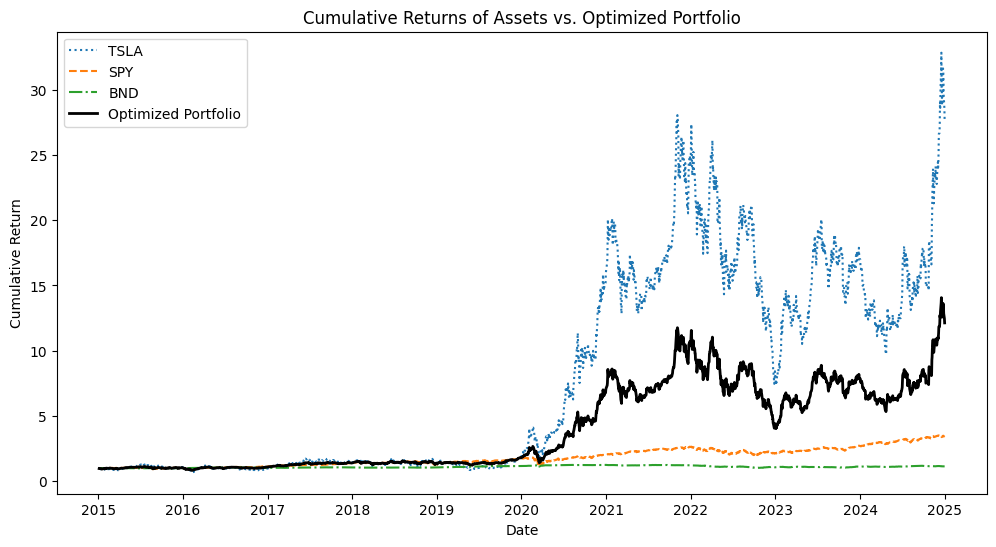

In [105]:
#Compare Portfolio Performance Over Time
import matplotlib.pyplot as plt

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Weighted portfolio returns
cumulative_portfolio_returns = (cumulative_returns * optimized_weights).sum(axis=1)

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns.index, cumulative_returns['TSLA'], label='TSLA', linestyle='dotted')
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY', linestyle='dashed')
plt.plot(cumulative_returns.index, cumulative_returns['BND'], label='BND', linestyle='dashdot')
plt.plot(cumulative_returns.index, cumulative_portfolio_returns, label='Optimized Portfolio', color='black', linewidth=2)
plt.title("Cumulative Returns of Assets vs. Optimized Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()
